# Profiles Clustering

*The aim of this notebook is to explore and find out if the inner relations of generated profiles data allow to define a number of homogenuous clusters, which in its turn is a possible way to acquire a useful insight.*

## Settings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import scipy 

In [2]:
 # @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='******************', project_access_token='******************')
pc = project.project_context


## Load data

In [3]:
# loading profiles.csv
f = project.get_file('profiles.csv')
profiles = pd.read_csv(f)
profiles.head()

UID  Openness  Conscientiousness  Extraversion  Agreeableness  \
0   89168924  0.672358           0.515518      0.202560       0.388493   
1   74580436  0.769577           0.442860      0.063138       0.152624   
2   52536879  0.445128           0.776801      0.899640       0.881138   
3   17243213  0.707812           0.725007      0.057476       0.296220   
4  278662460  0.659059           0.788241      0.708605       0.238162   

   Emotional range  Challenge  Closeness  Curiosity  Excitement  ...  \
0         0.952090   0.449133   0.491036   0.373575    0.361041  ...   
1         0.998766   0.792551   0.712586   0.726484    0.940915  ...   
2         0.706536   0.857511   0.842577   0.751038    0.759625  ...   
3         0.990815   0.551724   0.447475   0.519926    0.487398  ...   
4         0.566861   0.686579   0.331890   0.248036    0.528839  ...   

       Love  Practicality  Self-expression  Stability  Structure  \
0  0.669498      0.527576         0.765530   0.314229   0.463151   
1  0.964348      0.991403         0.998430   0.923608   0.908561   
2  0.899586      0.529881         0.791273   0.899268   0.607543   
3  0.542529      0.546406         0.840359   0.770971   0.740211   
4  0.247863      0.619599         0.413212   0.747458   0.800460   

   Conservation  Openness to change  Hedonism  Self-enhancement  \
0      0.362166            0.480516  0.437073          0.592248   
1      0.743416            0.608181  0.473193          0.882402   
2      0.917088            0.715703  0.825515          0.962015   
3      0.411759            0.566608  0.215377          0.478906   
4      0.741150            0.436434  0.685875          0.959131   

   Self-transcendence  
0            0.485292  
1            0.857386  
2            0.753915  
3            0.604419  
4            0.235388  

[5 rows x 23 columns]

In [4]:
for c in profiles.columns:
    print(c)

UID
Openness
Conscientiousness
Extraversion
Agreeableness
Emotional range
Challenge
Closeness
Curiosity
Excitement
Harmony
Ideal
Liberty
Love
Practicality
Self-expression
Stability
Structure
Conservation
Openness to change
Hedonism
Self-enhancement
Self-transcendence


In [5]:
profiles.drop(columns=['UID'], inplace=True)
profiles.head()

Openness  Conscientiousness  Extraversion  Agreeableness  Emotional range  \
0  0.672358           0.515518      0.202560       0.388493         0.952090   
1  0.769577           0.442860      0.063138       0.152624         0.998766   
2  0.445128           0.776801      0.899640       0.881138         0.706536   
3  0.707812           0.725007      0.057476       0.296220         0.990815   
4  0.659059           0.788241      0.708605       0.238162         0.566861   

   Challenge  Closeness  Curiosity  Excitement   Harmony  ...      Love  \
0   0.449133   0.491036   0.373575    0.361041  0.673358  ...  0.669498   
1   0.792551   0.712586   0.726484    0.940915  0.769730  ...  0.964348   
2   0.857511   0.842577   0.751038    0.759625  0.892253  ...  0.899586   
3   0.551724   0.447475   0.519926    0.487398  0.721506  ...  0.542529   
4   0.686579   0.331890   0.248036    0.528839  0.559211  ...  0.247863   

   Practicality  Self-expression  Stability  Structure  Conservation  \
0      0.527576         0.765530   0.314229   0.463151      0.362166   
1      0.991403         0.998430   0.923608   0.908561      0.743416   
2      0.529881         0.791273   0.899268   0.607543      0.917088   
3      0.546406         0.840359   0.770971   0.740211      0.411759   
4      0.619599         0.413212   0.747458   0.800460      0.741150   

   Openness to change  Hedonism  Self-enhancement  Self-transcendence  
0            0.480516  0.437073          0.592248            0.485292  
1            0.608181  0.473193          0.882402            0.857386  
2            0.715703  0.825515          0.962015            0.753915  
3            0.566608  0.215377          0.478906            0.604419  
4            0.436434  0.685875          0.959131            0.235388  

[5 rows x 22 columns]

In [6]:
profiles.describe()

Openness  Conscientiousness  Extraversion  Agreeableness  \
count  5437.000000        5437.000000   5437.000000    5437.000000   
mean      0.669449           0.634839      0.359565       0.454195   
std       0.243834           0.276656      0.264170       0.280681   
min       0.000148           0.001520      0.000120       0.000067   
25%       0.503446           0.426898      0.135263       0.215380   
50%       0.726838           0.701953      0.304610       0.441138   
75%       0.871573           0.873233      0.547631       0.680429   
max       0.999984           0.999581      0.999709       0.999976   

       Emotional range    Challenge    Closeness    Curiosity   Excitement  \
count     5.437000e+03  5437.000000  5437.000000  5437.000000  5437.000000   
mean      5.471510e-01     0.506897     0.398897     0.563287     0.350509   
std       2.666695e-01     0.288104     0.263777     0.277334     0.256597   
min       5.961898e-13     0.000028     0.000559     0.000002     0.000895   
25%       3.414874e-01     0.266883     0.176598     0.341915     0.136059   
50%       5.579829e-01     0.506229     0.355544     0.593894     0.287648   
75%       7.624979e-01     0.756305     0.598835     0.799853     0.518934   
max       1.000000e+00     0.999880     0.999274     0.999999     0.989052   

           Harmony  ...         Love  Practicality  Self-expression  \
count  5437.000000  ...  5437.000000  5.437000e+03      5437.000000   
mean      0.491464  ...     0.356050  4.284216e-01         0.444790   
std       0.282348  ...     0.253524  2.719011e-01         0.267704   
min       0.000858  ...     0.000586  7.664551e-08         0.000783   
25%       0.255979  ...     0.142448  2.032308e-01         0.226846   
50%       0.489323  ...     0.302825  3.878308e-01         0.401287   
75%       0.725141  ...     0.532583  6.298375e-01         0.647782   
max       0.999967  ...     0.996374  9.999928e-01         0.999996   

         Stability     Structure  Conservation  Openness to change  \
count  5437.000000  5.437000e+03   5437.000000         5437.000000   
mean      0.548499  6.108888e-01      0.413392            0.487549   
std       0.277245  2.723577e-01      0.285707            0.243866   
min       0.000376  1.899609e-10      0.000412            0.000474   
25%       0.318618  4.160837e-01      0.162887            0.296998   
50%       0.573007  6.583087e-01      0.367843            0.479699   
75%       0.790936  8.449326e-01      0.638980            0.670005   
max       0.999456  9.993441e-01      0.999493            0.999744   

          Hedonism  Self-enhancement  Self-transcendence  
count  5437.000000       5437.000000         5437.000000  
mean      0.342888          0.463130            0.359906  
std       0.259178          0.286317            0.240054  
min       0.000571          0.000037            0.000002  
25%       0.123707          0.214322            0.164994  
50%       0.279571          0.445823            0.320954  
75%       0.528695          0.706567            0.524258  
max       0.998149          0.998342            0.999210  

[8 rows x 22 columns]

In [7]:
profiles.dropna(axis=0, inplace=True)
len(profiles)

5437

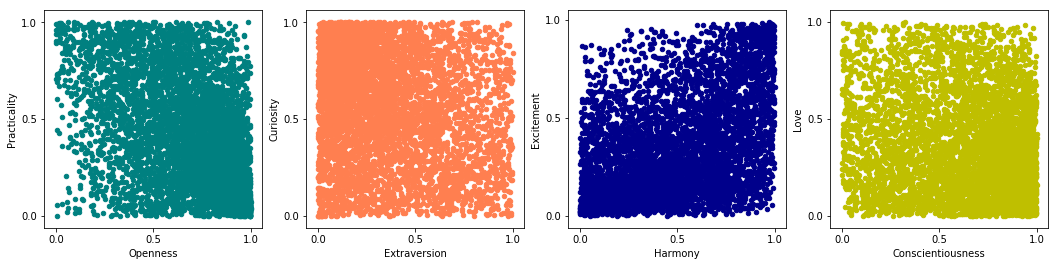

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

profiles.plot.scatter("Openness", "Practicality", c='teal', ax=axs[0], xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
profiles.plot.scatter("Extraversion", "Curiosity", c='coral', ax=axs[1], xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
profiles.plot.scatter("Harmony", "Excitement", c='darkblue', ax=axs[2], xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
profiles.plot.scatter("Conscientiousness", "Love", c='y', ax=axs[3], xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])

## Auxilary Functions

In [9]:
def Davies_Bouldin_index(df, cats, cluster_cores, distance, order=1):
    
    n = len(cluster_cores)
    sigmas = np.zeros(n)
    
    # average intra-cluster distances
    for i, cc in enumerate(cluster_cores):
        sigmas[i] = np.mean(df[df[cats] == i].apply(lambda row: distance(row[:-1], cluster_cores[i], k=order), axis=1))
    
    # max intra-inter relations
    dists = [np.max([(sigmas[i] + sigmas[j])/distance(cluster_cores[i], cluster_cores[j], order) for j in range(n) if i != j]) for i in range(n)]
    return np.mean(dists)
    

In [10]:
def Distribution_distance(x, mean, cov):
    n = len(mean)
    stds = np.array([[cov[i, j] for j in range(n) if i == j][0] for i in range(n)])
    
    return scipy.linalg.norm(np.divide(np.abs(x-mean), stds))

def Mahalanobis_distance(x, mean, inv_cov):
    return (x-mean).T@inv_cov@(x-mean)

def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

def minmax_scaling(z):
    return (z - np.min(z))/(np.max(z) - np.min(z))

In [11]:
def Davies_Bouldin_Mahalanobis(df, cats, cluster_cores, inv_cov):
    
    n = len(cluster_cores)
    sigmas = np.zeros(n)
    
    # average intra-cluster distances
    for i, cc in enumerate(cluster_cores):
        sigmas[i] = np.mean(df[df[cats] == i].apply(lambda row: Mahalanobis_distance(row[:-1], cc, inv_cov[i]), axis=1))
    
    # max intra-inter relations
    dists = [np.max([(sigmas[i] + sigmas[j])/Mahalanobis_distance(cluster_cores[i], cluster_cores[j], inv_cov[j]) for j in range(n) if i != j]) for i in range(n)]
    return np.mean(dists)

In [12]:
def boxplot(param, cats, data, ax=None):
    if not ax:
        fig, (ax) = plt.subplots(1, 1, figsize=(12, 4))
        fig.suptitle('A box plot', fontsize=14)

    sns.boxplot(x=cats, y=param, data=data,  ax=ax, orient='v')
    ax.set_xlabel("{:s}".format(param),size = 12,alpha=0.8)
    ax.set_ylabel("",size = 12,alpha=0.8)

In [13]:
def radar_plot(data, traits, COLOR='coral', 
               title=None, ax=None, labeled=None, 
               drop_xticks=False, drop_yticks=False):
    N = len(traits)
    # arclength from 0 up to this point (i)
    angles = [2*np.pi*i/N for i in range(N)]
    
    if not ax:
        fig = plt.figure(figsize=(10, 10))
        ax = plt.subplot(111, polar=True)

    # structure
    ax.set_xticks(angles)
    plt.xticks(angles, traits)
    ax.set_yticks([0, 0.2, 0.5, 0.8, 1.0])
    ax.set_thetalim(0, 2*np.pi)
    ax.tick_params(direction='out', labelsize=12, colors='black',
               grid_color='dimgrey', grid_alpha=0.8, labelrotation='auto')
    
    if drop_xticks:
        plt.tick_params(
                axis='both',    
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False) # labels along the bottom edge are off
    
    if drop_yticks:
        ax.set_yticks([])

    # duplicating first point to close the circle
    data = np.append(data, data[0])
    angles.append(angles[0])
    
    if title:
        ax.set_title(title, fontsize=12)
    
    ax.plot(angles, data, color=COLOR, linewidth=3, label=labeled)
    ax.plot(angles, data, color=COLOR, linewidth=5, alpha=0.1)
    ax.plot(angles, data, color=COLOR, linewidth=8, alpha=0.5)
    ax.fill(angles, data, alpha=0.23, color=COLOR);
    

In [14]:
def Silhouette_from_scratch(df, distance, inv_covs=None):
    
    X = df.to_numpy()
    labels = X[:, -1]
    X = X[:, :-1]
    
    # computing sizes of C_i
    cluster_codes, cluster_lengths = np.unique(labels, return_counts=True)
    cluster_sizes = {c:cluster_lengths[i] for i, c in enumerate(cluster_codes)}
    
    # creating a resulting array
    sil = np.zeros_like(labels)
    subsets = {c:X[labels == c] for c in cluster_codes}
    
    if distance == 'l2':
        # mean distance to kindred
        ai = np.array([np.sum([np.linalg.norm(X[i] - kindred) for kindred in subsets[labels[i]]])/(cluster_sizes[labels[i]]-1) for i in range(len(X))])
        
        # smallest distance to other clusters
        bi = np.array([np.min([np.sum([np.linalg.norm(X[i] - other) for other in subsets[K]])/cluster_sizes[K] for K in cluster_codes if K != labels[i]]) for i in range(len(X))])
        
        # silhouette coefficient
        sil = (bi - ai)/np.max([ai, bi], axis=0)
        
    
    return sil

In [15]:
def silhouette_evaluation(df, plot=True, distance='l2',samples_per_class=50, cmap='hsv'):
    
    X = df.to_numpy()
    labels = X[:, -1]
    X = X[:, :-1]
    cluster_codes, cluster_lengths = np.unique(labels, return_counts=True)
    
    sil = silhouette_samples(X, labels, metric=distance)
    sil_score = silhouette_score(X, labels, metric=distance)
    
    res_df = pd.DataFrame(np.stack([labels, sil], axis=1), columns=['Class', 'Silhouette'])
    sil_means = res_df.groupby('Class').mean()
    
    print('Silhouette quality of each cluster:')
    print(sil_means)
    print('Silhouette score of the clustering is: ', sil_score)
    if plot:
        sample_df = pd.DataFrame(columns=['Class', 'Silhouette'])
        ax_labels = []
        
        for cat in cluster_codes:
            sample_df = pd.concat([sample_df, res_df[res_df['Class'] == cat].sample(samples_per_class)])
            ax_labels.append("Cluster {:d}".format(int(cat)))
            
        # Create a color palette:
        my_palette = plt.cm.get_cmap(cmap, len(cluster_codes))
        sam = sample_df.to_numpy()
        sam_class = sam[:, 0]
        sam_sil = sam[:, 1]
        
        fig, ax = plt.subplots(figsize=(15, 20))
        plt.title('Silhouette values', fontsize=20)
        
        plt.barh(y=np.arange(0, len(sam_sil)), width=sam_sil, edgecolor='k',
                 color=my_palette(sam_class/np.max(sam_class)))
        
        ax.set_yticks(cluster_codes*samples_per_class + samples_per_class//2)
        ax.set_yticklabels(ax_labels, fontsize=13, rotation='vertical')
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel('Silhouette', fontsize=15)              
        
        
    return res_df, sil_means
    
    

## Cluster tendency
*The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.*

`ref.:  Hopkins, Brian; Skellam, John Gordon (1954). "A new method for determining the type of distribution of plant individuals". Annals of Botany. Annals Botany Co. 18 (2): 213–227.`

In [16]:
def Lk_norm(point1, point2, k=2):
    
    n = len(point1)
    return np.power(np.sum([np.abs(point1[i] - point2[i])**k for i in range(n)]), 1/k)
    
def Hopkins_statistic(df, distance, n=100, m = 3):
    
    d = df.shape[1]
    sample = df.sample(n=n, axis=0).to_numpy()
    rd = np.random.uniform(size=(m, d))
    
    # u_i
    outer_dist = [np.min([distance(rd[i], sample[j], k=1) for j in range(n)]) for i in range(m)]
    # w_i
    inner_dist = [np.min([distance(sample[i], sample[j], k=1) for j in range(n) if i != j]) for i in range(m)]
    
    return np.sum(np.power(outer_dist, d)) / (np.sum(np.power(outer_dist, d)) + np.sum(np.power(inner_dist, d)))

In [17]:
for i in range(10):
    print(Hopkins_statistic(profiles, Lk_norm, m=50))

0.9984748319506102
0.9997594203210862
0.999909809314807
0.9998004553842589
0.9999523887790064
0.9991490627024707
0.999900238453212
0.9999551509597709
0.9998997244524834
0.9711270835496345


***Comment:*** It seems that our data has high tendency to being clusterized.

## K-means baseline approach

### Model

In [23]:
from sklearn.cluster import KMeans

In [24]:
data = profiles.to_numpy()
data.shape

(5437, 22)

In [29]:
# 1
# small n_clusters
start_time = time.time()
kmeans = KMeans(n_clusters=4, random_state=0, algorithm='full').fit(data)
print("Took {:.2f} seconds.".format(time.time() - start_time))

Took 0.36 seconds.


In [30]:
cat = kmeans.labels_
df = profiles.copy()
df['Class'] = cat
df.head()

Openness  Conscientiousness  Extraversion  Agreeableness  Emotional range  \
0  0.672358           0.515518      0.202560       0.388493         0.952090   
1  0.769577           0.442860      0.063138       0.152624         0.998766   
2  0.445128           0.776801      0.899640       0.881138         0.706536   
3  0.707812           0.725007      0.057476       0.296220         0.990815   
4  0.659059           0.788241      0.708605       0.238162         0.566861   

   Challenge  Closeness  Curiosity  Excitement   Harmony  ...  Practicality  \
0   0.449133   0.491036   0.373575    0.361041  0.673358  ...      0.527576   
1   0.792551   0.712586   0.726484    0.940915  0.769730  ...      0.991403   
2   0.857511   0.842577   0.751038    0.759625  0.892253  ...      0.529881   
3   0.551724   0.447475   0.519926    0.487398  0.721506  ...      0.546406   
4   0.686579   0.331890   0.248036    0.528839  0.559211  ...      0.619599   

   Self-expression  Stability  Structure  Conservation  Openness to change  \
0         0.765530   0.314229   0.463151      0.362166            0.480516   
1         0.998430   0.923608   0.908561      0.743416            0.608181   
2         0.791273   0.899268   0.607543      0.917088            0.715703   
3         0.840359   0.770971   0.740211      0.411759            0.566608   
4         0.413212   0.747458   0.800460      0.741150            0.436434   

   Hedonism  Self-enhancement  Self-transcendence  Class  
0  0.437073          0.592248            0.485292      3  
1  0.473193          0.882402            0.857386      1  
2  0.825515          0.962015            0.753915      1  
3  0.215377          0.478906            0.604419      3  
4  0.685875          0.959131            0.235388      3  

[5 rows x 23 columns]

In [22]:
# 2
# big n_clusters
start_time = time.time()
kmeans2 = KMeans(n_clusters=10, random_state=0, algorithm='full').fit(data)
print("Took {:.2f} seconds.".format(time.time() - start_time))

df2 = profiles.copy()
df2['Class'] = kmeans2.labels_
df2.head()

Took 0.79 seconds.


Openness  Conscientiousness  Extraversion  Agreeableness  Emotional range  \
0  0.672358           0.515518      0.202560       0.388493         0.952090   
1  0.769577           0.442860      0.063138       0.152624         0.998766   
2  0.445128           0.776801      0.899640       0.881138         0.706536   
3  0.707812           0.725007      0.057476       0.296220         0.990815   
4  0.659059           0.788241      0.708605       0.238162         0.566861   

   Challenge  Closeness  Curiosity  Excitement   Harmony  ...  Practicality  \
0   0.449133   0.491036   0.373575    0.361041  0.673358  ...      0.527576   
1   0.792551   0.712586   0.726484    0.940915  0.769730  ...      0.991403   
2   0.857511   0.842577   0.751038    0.759625  0.892253  ...      0.529881   
3   0.551724   0.447475   0.519926    0.487398  0.721506  ...      0.546406   
4   0.686579   0.331890   0.248036    0.528839  0.559211  ...      0.619599   

   Self-expression  Stability  Structure  Conservation  Openness to change  \
0         0.765530   0.314229   0.463151      0.362166            0.480516   
1         0.998430   0.923608   0.908561      0.743416            0.608181   
2         0.791273   0.899268   0.607543      0.917088            0.715703   
3         0.840359   0.770971   0.740211      0.411759            0.566608   
4         0.413212   0.747458   0.800460      0.741150            0.436434   

   Hedonism  Self-enhancement  Self-transcendence  Class  
0  0.437073          0.592248            0.485292      6  
1  0.473193          0.882402            0.857386      1  
2  0.825515          0.962015            0.753915      1  
3  0.215377          0.478906            0.604419      4  
4  0.685875          0.959131            0.235388      5  

[5 rows x 23 columns]

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


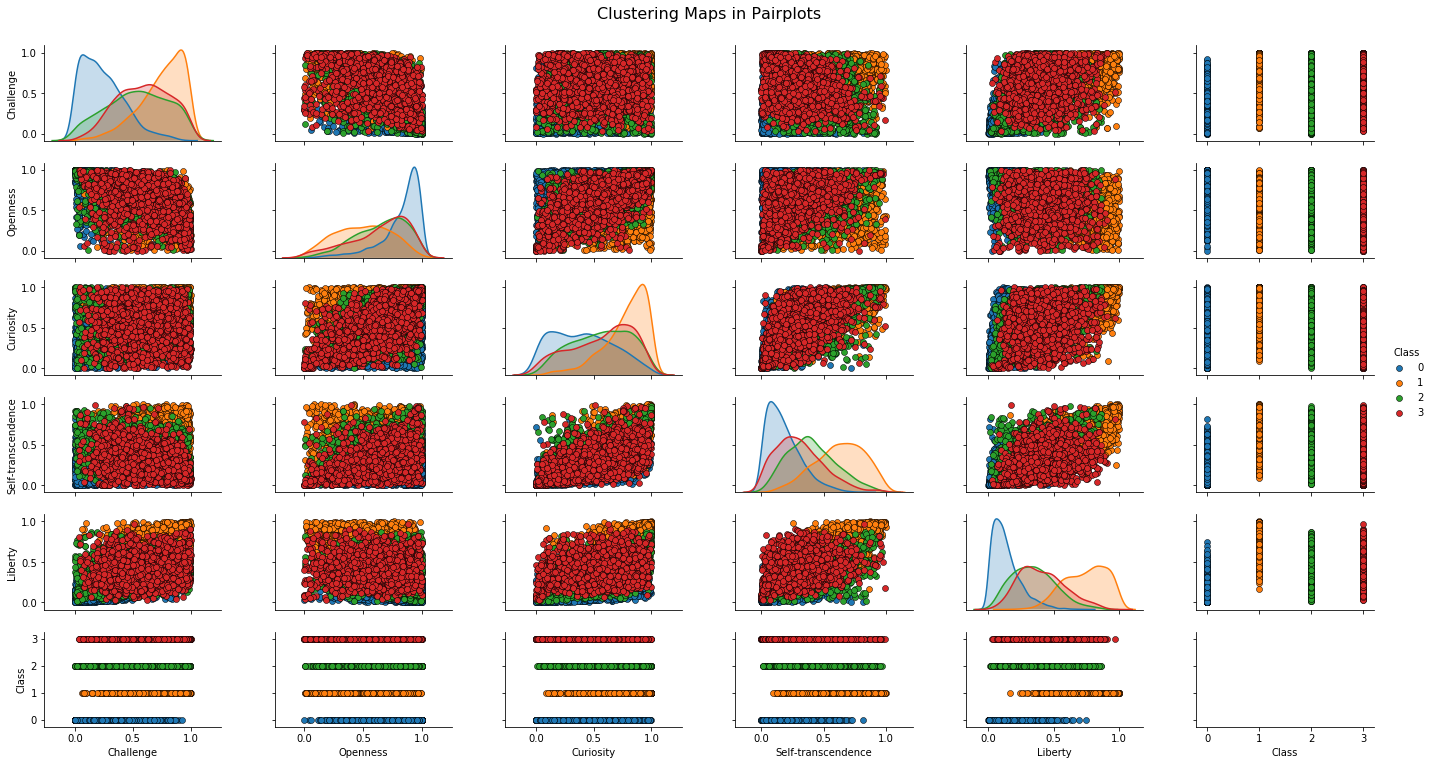

In [28]:
some_params = ['Challenge', 'Hedonism', 'Openness', 'Emotional range', 
               'Curiosity', 'Self-transcendence', 'Liberty', 'Love',
              'Class']

few_params = ['Challenge', 'Openness', 'Curiosity', 'Self-transcendence', 'Liberty',
              'Class']

pp = sns.pairplot(df[few_params], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True), 
                 hue='Class')

fig = pp.fig 

fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Clustering Maps in Pairplots', fontsize=16)

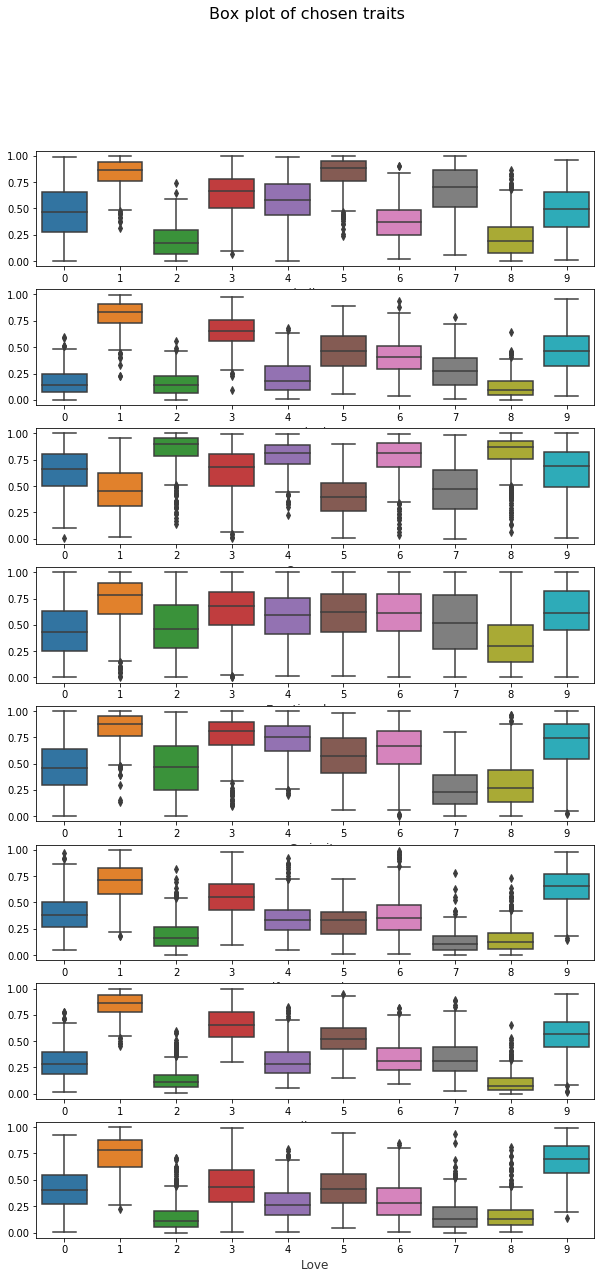

In [20]:
some_params = ['Challenge', 'Hedonism', 'Openness', 'Emotional range', 'Curiosity', 'Self-transcendence', 'Liberty', 'Love']
fig, axs = plt.subplots(len(some_params), 1, figsize=(10, 20))
fig.suptitle('Box plot of chosen traits', fontsize=16)

for i, trait in enumerate(some_params):
    boxplot(trait, 'Class', df2, axs[i])
    
#plt.tight_layout()

### Evaluation

In [21]:
cluster_cores = kmeans.cluster_centers_
cluster_cores2 = kmeans2.cluster_centers_

In [22]:
Davies_Bouldin_index(df, 'Class', cluster_cores, Lk_norm)

1.7675571381174258

In [23]:
Davies_Bouldin_index(df2, 'Class', cluster_cores2, Lk_norm)

1.9195695388365326

In [24]:
cores = pd.DataFrame(cluster_cores, columns=df.columns[:-1])
cores

Openness  Conscientiousness  Extraversion  Agreeableness  Emotional range  \
0  0.823161           0.662128      0.418125       0.372202         0.432088   
1  0.497642           0.528949      0.322173       0.547931         0.680124   
2  0.653891           0.822283      0.450228       0.703068         0.528225   
3  0.638832           0.505842      0.231873       0.235995         0.596155   

   Challenge  Closeness  Curiosity  Excitement   Harmony  ...      Love  \
0   0.243223   0.192507   0.409095    0.135491  0.228191  ...  0.169191   
1   0.750870   0.699865   0.780605    0.703771  0.801143  ...  0.652502   
2   0.539680   0.553518   0.567168    0.255726  0.666561  ...  0.431788   
3   0.594263   0.254125   0.569233    0.415450  0.387837  ...  0.267923   

   Practicality  Self-expression  Stability  Structure  Conservation  \
0      0.243533         0.240267   0.338417   0.481755      0.186523   
1      0.690967         0.784782   0.794826   0.696644      0.695158   
2      0.286454         0.434744   0.697728   0.699480      0.552315   
3      0.575888         0.425831   0.457238   0.610556      0.323705   

   Openness to change  Hedonism  Self-enhancement  Self-transcendence  
0            0.324170  0.150896          0.210810            0.182024  
1            0.746375  0.704104          0.794275            0.630977  
2            0.449336  0.230518          0.357099            0.408224  
3            0.511878  0.390955          0.601285            0.307974  

[4 rows x 22 columns]

In [25]:
cores = pd.DataFrame(cluster_cores2, columns=df.columns[:-1])
cores

Openness  Conscientiousness  Extraversion  Agreeableness  Emotional range  \
0  0.645090           0.885678      0.535997       0.776438         0.443937   
1  0.459168           0.531321      0.311291       0.564894         0.721601   
2  0.845576           0.473220      0.289476       0.226373         0.483493   
3  0.635428           0.310020      0.245285       0.269157         0.640329   
4  0.785548           0.738587      0.270230       0.443391         0.581953   
5  0.399928           0.781446      0.245087       0.492606         0.605682   
6  0.772699           0.282856      0.290463       0.260001         0.614674   
7  0.464522           0.700371      0.235165       0.177259         0.532027   
8  0.825020           0.857974      0.580708       0.527485         0.349891   
9  0.647474           0.613261      0.538502       0.797454         0.617265   

   Challenge  Closeness  Curiosity  Excitement   Harmony  ...      Love  \
0   0.463540   0.604855   0.468202    0.207432  0.673682  ...  0.413780   
1   0.830044   0.782395   0.839510    0.816986  0.874097  ...  0.743166   
2   0.191602   0.131896   0.467236    0.140660  0.178276  ...  0.151573   
3   0.635018   0.439985   0.756591    0.616107  0.561084  ...  0.442295   
4   0.574497   0.295208   0.725045    0.217204  0.506493  ...  0.284641   
5   0.837836   0.501315   0.559656    0.531515  0.687341  ...  0.416851   
6   0.379551   0.250869   0.632417    0.307599  0.342250  ...  0.303102   
7   0.678545   0.203707   0.265185    0.446483  0.247476  ...  0.168143   
8   0.222322   0.237470   0.302239    0.105509  0.242368  ...  0.163031   
9   0.482456   0.751221   0.694418    0.436638  0.799016  ...  0.684300   

   Practicality  Self-expression  Stability  Structure  Conservation  \
0      0.195927         0.361940   0.680165   0.692330      0.581069   
1      0.792361         0.869551   0.868385   0.795168      0.803852   
2      0.278881         0.243932   0.190322   0.364378      0.105709   
3      0.672170         0.691968   0.567140   0.542717      0.354110   
4      0.388440         0.423868   0.574099   0.762374      0.318318   
5      0.665084         0.473831   0.794604   0.873454      0.751469   
6      0.434174         0.462322   0.272312   0.360642      0.155138   
7      0.612976         0.217827   0.517344   0.693223      0.439931   
8      0.169701         0.205327   0.456925   0.565276      0.247318   
9      0.327373         0.733723   0.707710   0.439610      0.592922   

   Openness to change  Hedonism  Self-enhancement  Self-transcendence  
0            0.400996  0.171118          0.261882            0.391466  
1            0.817294  0.806873          0.866362            0.699556  
2            0.364695  0.154937          0.221921            0.187993  
3            0.745745  0.649166          0.759743            0.548940  
4            0.505382  0.215489          0.390312            0.345489  
5            0.463284  0.464478          0.700851            0.320448  
6            0.548866  0.400688          0.531453            0.372183  
7            0.325307  0.285174          0.567092            0.121447  
8            0.248948  0.121271          0.147006            0.149610  
9            0.631916  0.459209          0.528580            0.643925  

[10 rows x 22 columns]

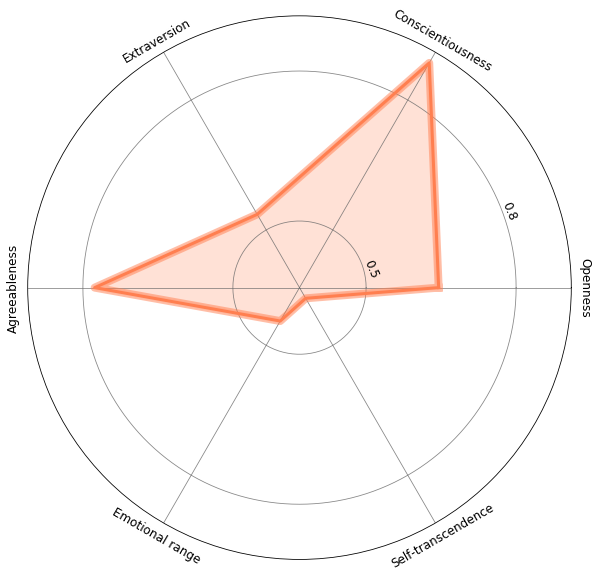

In [26]:
some_params = ['Challenge', 'Hedonism', 'Openness', 'Emotional range', 
               'Curiosity', 'Self-transcendence', 'Liberty', 'Love']

big5params = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Emotional range', 'Self-transcendence']

radar_plot(data = cores[big5params].to_numpy()[0], traits=big5params)

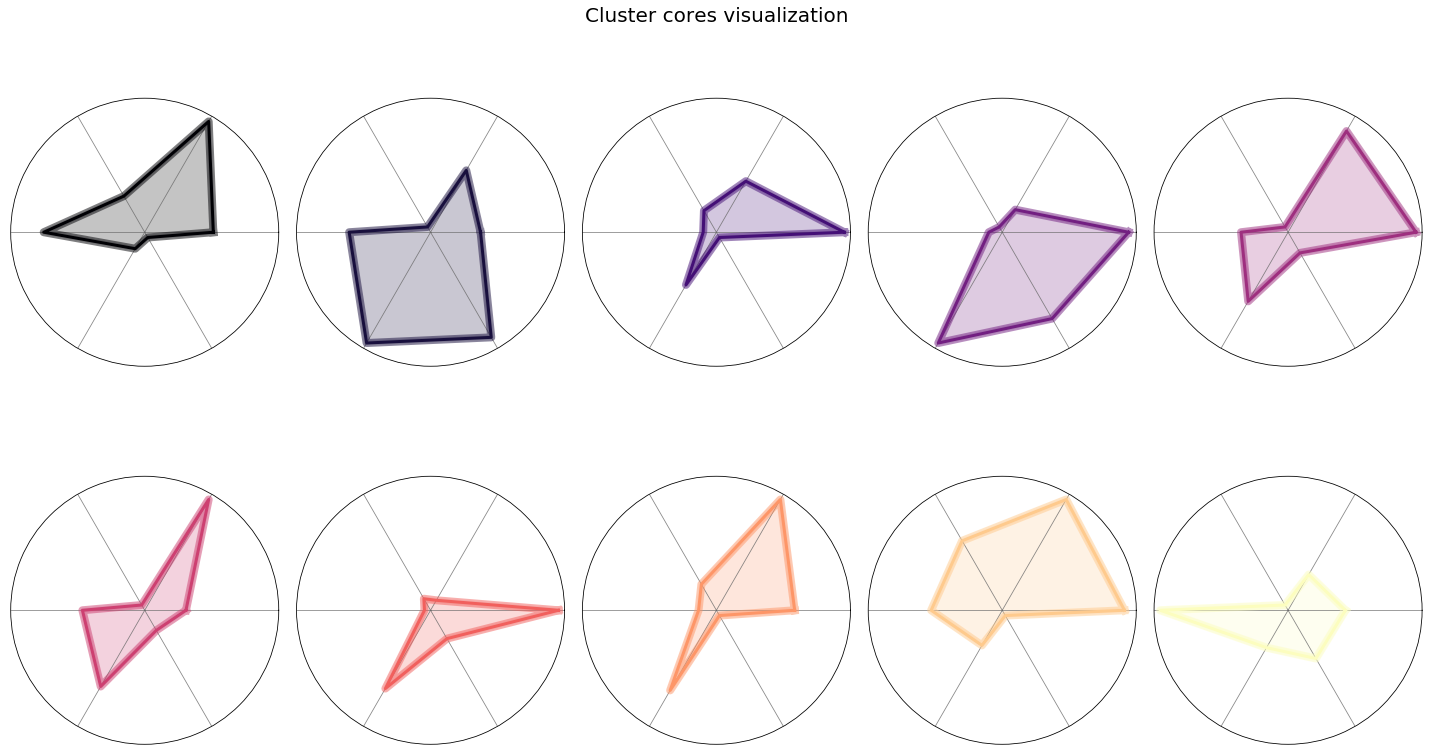

In [27]:
# Create a color palette:
my_palette = plt.cm.get_cmap("magma", len(cores.index))

nb_clusters = len(cores)
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Cluster cores visualization', fontsize=20)

for i in range(nb_clusters):
    axs = plt.subplot(2, 5, i+1, polar=True)
    radar_plot(data = cores[big5params].to_numpy()[i], traits=big5params, 
               COLOR=my_palette(i), ax=axs, drop_yticks=True, drop_xticks=True)
    
plt.tight_layout()
        


### Silhouette evaluation

In [155]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

Silhouette score of the clustering is:  0.1904322930381828
(array([0., 1., 2., 3.]), array([100, 100, 100, 100]))


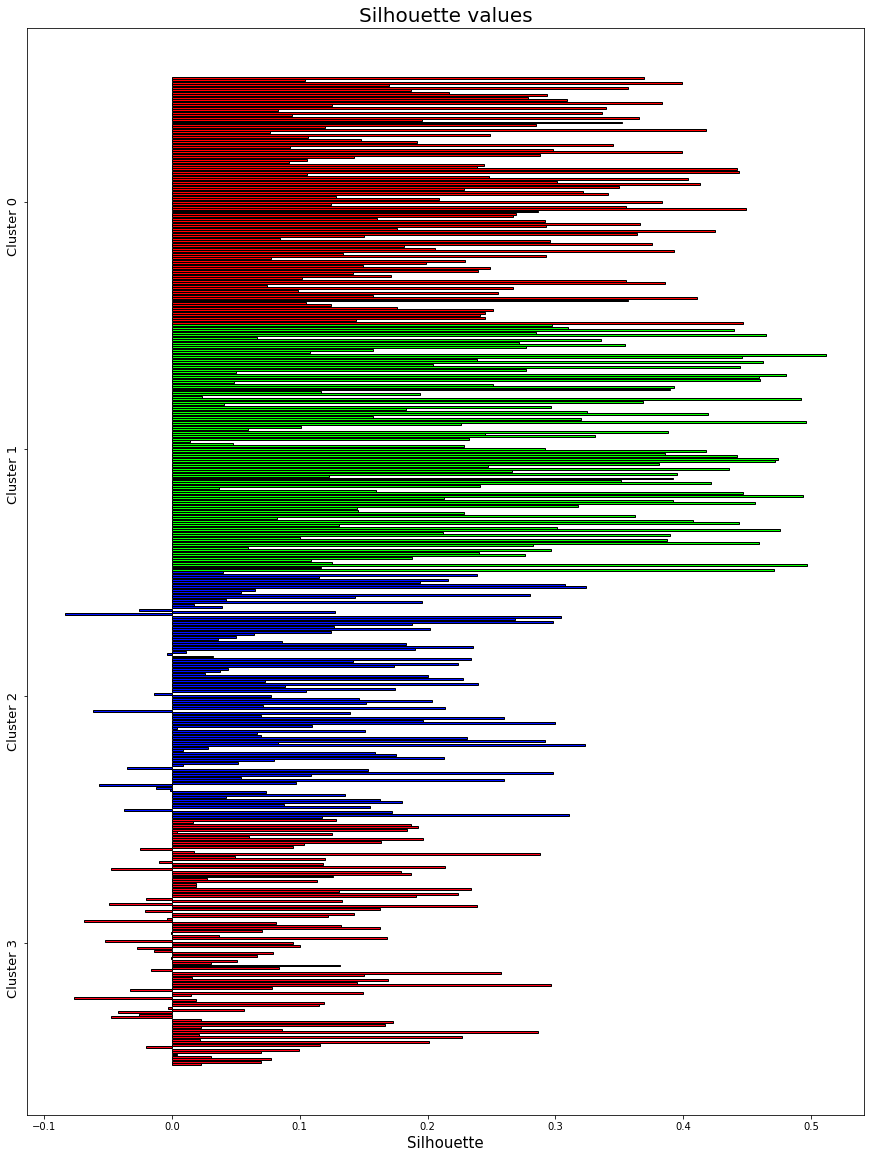

In [153]:
r = silhouette_evaluation(df, distance='l1', samples_per_class=100)

In [132]:
start_time = time.time()
skm = Silhouette_by_hand(df, 'l2')
print("Took {:.2f} seconds".format(time.time() - start_time))

Took 176.20 seconds


In [133]:
skm[:10]

array([0.08769625, 0.34492991, 0.33758865, 0.00636191, 0.06895803,
       0.0854496 , 0.08243001, 0.41886077, 0.02087916, 0.14333162])

In [138]:
sil[:10]

array([0.08769625, 0.34492991, 0.33758865, 0.00636191, 0.06895803,
       0.0854496 , 0.08243001, 0.41886077, 0.02087916, 0.14333162])

## DBSCAN

*The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).*

In [182]:
from sklearn.cluster import DBSCAN

In [183]:
data = profiles.to_numpy()
N = data.shape[0]
data.shape

(5437, 22)

### Measuring distances

In [186]:
nb_tests = 1000
l = []

for i in range(nb_tests):
    a = np.random.randint(N)
    b = np.random.randint(N)
    
    if a == b:
        b = np.random.randint(N)
    
    l.append(Lk_norm(data[a], data[b], k=2))

dists_df = pd.DataFrame(l, columns=['Distance'])

In [187]:
dists_df.describe()

Distance
count  1000.000000
mean      1.705727
std       0.510309
min       0.365593
25%       1.357814
50%       1.657638
75%       2.018528
max       3.540254

In [188]:
dist_milestones = list(np.arange(0.5, 3, 0.1))
for dist_milestone in dist_milestones:
    print("Ratio of instances with distance lower than {:.2f}:  {:.3f}".format(dist_milestone, dists_df[dists_df['Distance'] <= dist_milestone].count()['Distance']/nb_tests))

Ratio of instances with distance lower than 0.50:  0.001
Ratio of instances with distance lower than 0.60:  0.006
Ratio of instances with distance lower than 0.70:  0.014
Ratio of instances with distance lower than 0.80:  0.023
Ratio of instances with distance lower than 0.90:  0.045
Ratio of instances with distance lower than 1.00:  0.069
Ratio of instances with distance lower than 1.10:  0.106
Ratio of instances with distance lower than 1.20:  0.159
Ratio of instances with distance lower than 1.30:  0.215
Ratio of instances with distance lower than 1.40:  0.279
Ratio of instances with distance lower than 1.50:  0.358
Ratio of instances with distance lower than 1.60:  0.438
Ratio of instances with distance lower than 1.70:  0.535
Ratio of instances with distance lower than 1.80:  0.612
Ratio of instances with distance lower than 1.90:  0.687
Ratio of instances with distance lower than 2.00:  0.739
Ratio of instances with distance lower than 2.10:  0.787
Ratio of instances with distanc

### Model

In [213]:
start_time = time.time()
#dbscan = DBSCAN(eps=1.4, min_samples=int(N*0.1), metric='l2', n_jobs=-1).fit(data)
dbscan = DBSCAN(min_samples=10, eps=0.63, n_jobs=-1).fit(data)
print("Took {:.2f} seconds.".format(time.time() - start_time))

Took 0.93 seconds.


In [214]:
df = profiles.copy()
df['Class'] = dbscan.labels_
df.head()

Openness  Conscientiousness  Extraversion  Agreeableness  Emotional range  \
0  0.672358           0.515518      0.202560       0.388493         0.952090   
1  0.769577           0.442860      0.063138       0.152624         0.998766   
2  0.445128           0.776801      0.899640       0.881138         0.706536   
3  0.707812           0.725007      0.057476       0.296220         0.990815   
4  0.659059           0.788241      0.708605       0.238162         0.566861   

   Challenge  Closeness  Curiosity  Excitement   Harmony  ...  Practicality  \
0   0.449133   0.491036   0.373575    0.361041  0.673358  ...      0.527576   
1   0.792551   0.712586   0.726484    0.940915  0.769730  ...      0.991403   
2   0.857511   0.842577   0.751038    0.759625  0.892253  ...      0.529881   
3   0.551724   0.447475   0.519926    0.487398  0.721506  ...      0.546406   
4   0.686579   0.331890   0.248036    0.528839  0.559211  ...      0.619599   

   Self-expression  Stability  Structure  Conservation  Openness to change  \
0         0.765530   0.314229   0.463151      0.362166            0.480516   
1         0.998430   0.923608   0.908561      0.743416            0.608181   
2         0.791273   0.899268   0.607543      0.917088            0.715703   
3         0.840359   0.770971   0.740211      0.411759            0.566608   
4         0.413212   0.747458   0.800460      0.741150            0.436434   

   Hedonism  Self-enhancement  Self-transcendence  Class  
0  0.437073          0.592248            0.485292     -1  
1  0.473193          0.882402            0.857386      0  
2  0.825515          0.962015            0.753915      0  
3  0.215377          0.478906            0.604419      0  
4  0.685875          0.959131            0.235388     -1  

[5 rows x 23 columns]

In [215]:
cats, cts = np.unique(df['Class'].to_numpy(), return_counts=True)
for i, cat in enumerate(cats):
    print("Class: {:d} ---- Nb of instances: {:d}.".format(cat, cts[i]))

Class: -1 ---- Nb of instances: 1445.
Class: 0 ---- Nb of instances: 3954.
Class: 1 ---- Nb of instances: 15.
Class: 2 ---- Nb of instances: 13.
Class: 3 ---- Nb of instances: 10.


In [25]:
tot = 5437
ci = [3954, 15, 13, 10, 1445]
for i in ci:
    print(np.round(i/tot, 3))

0.727
0.003
0.002
0.002
0.266


/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


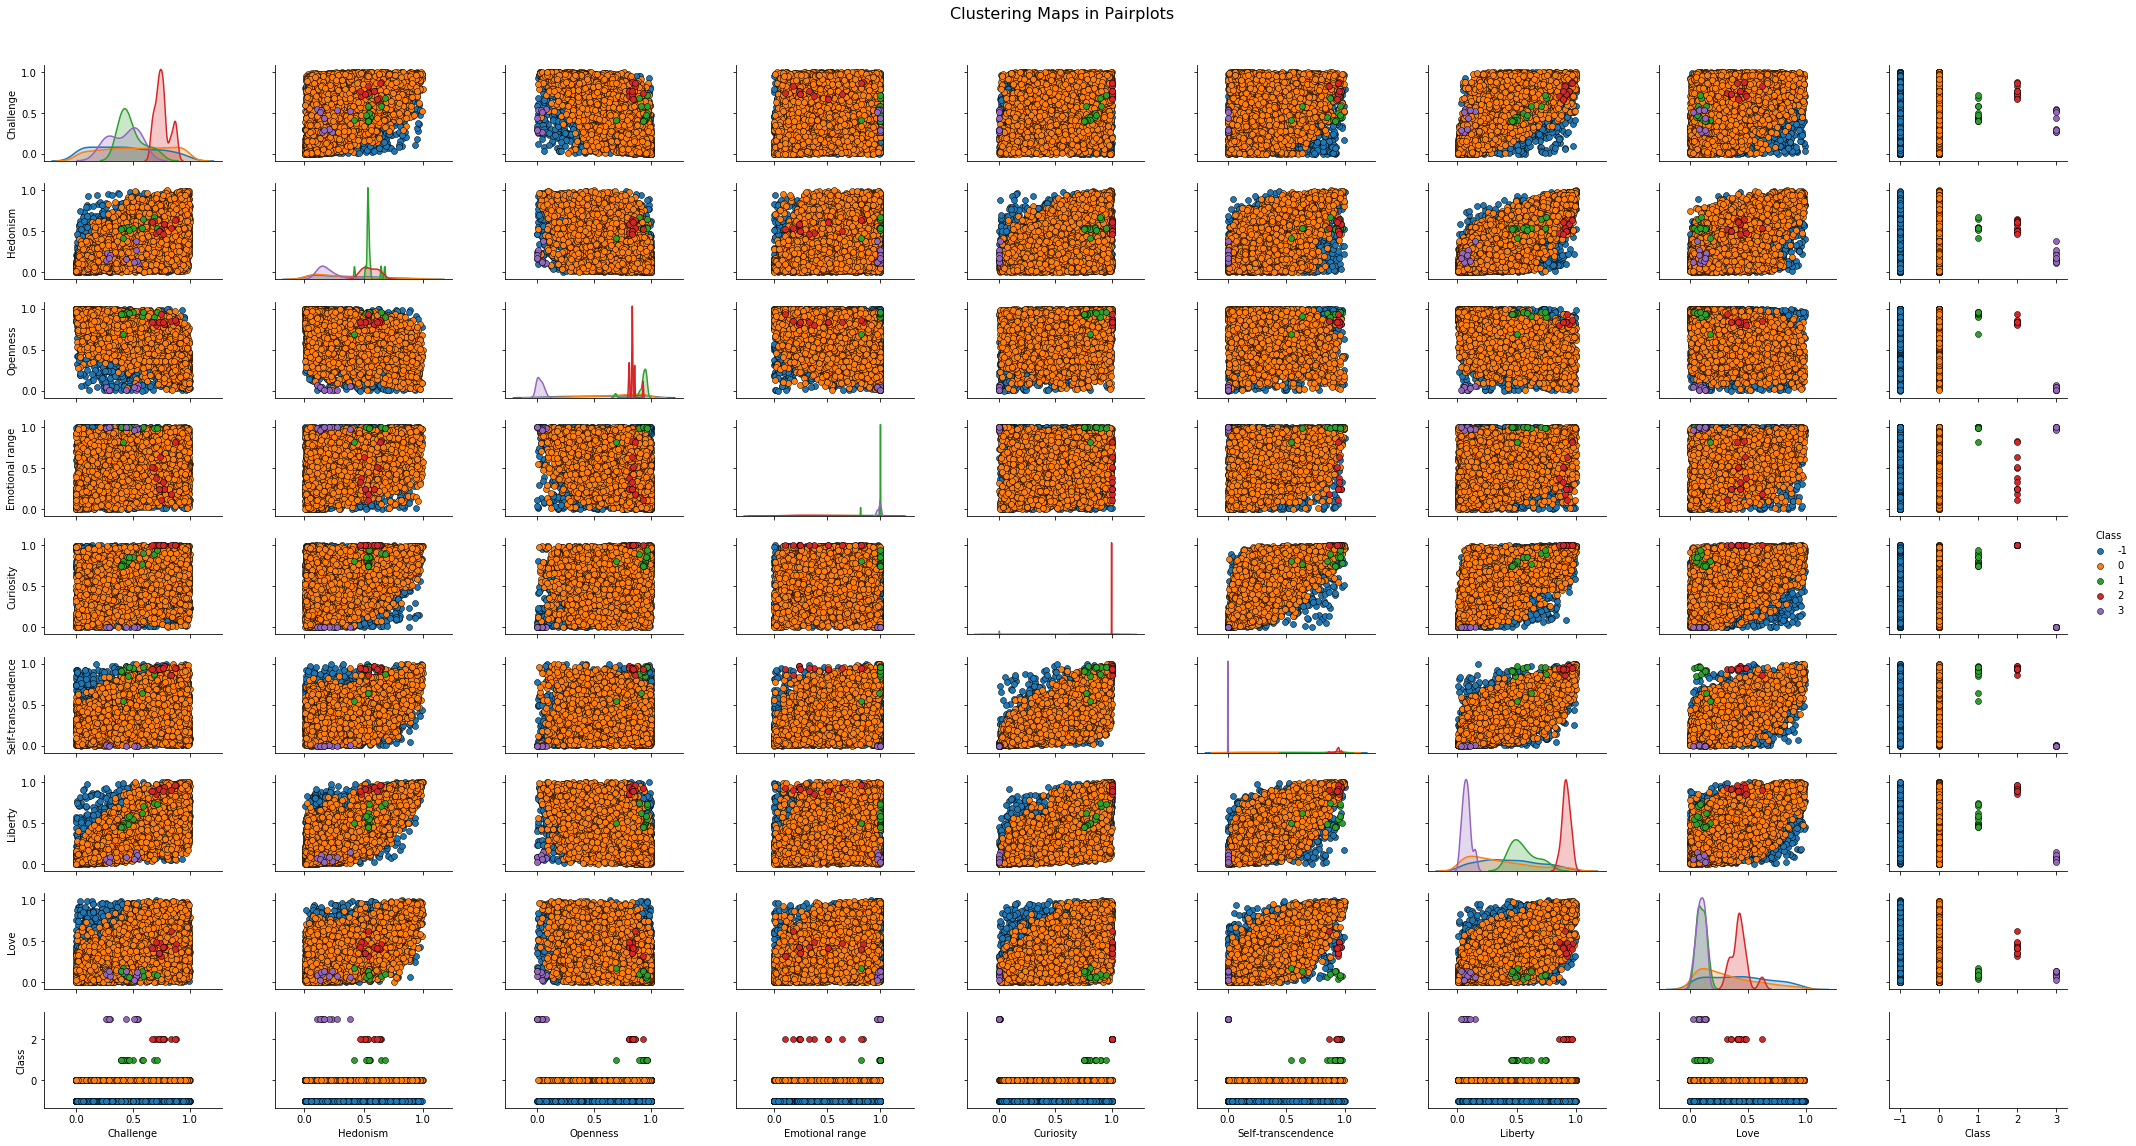

In [216]:
some_params = ['Challenge', 'Hedonism', 'Openness', 'Emotional range', 
               'Curiosity', 'Self-transcendence', 'Liberty', 'Love',
              'Class']

pp = sns.pairplot(df[some_params], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True), 
                 hue='Class')

fig = pp.fig 

fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Clustering Maps in Pairplots', fontsize=16)

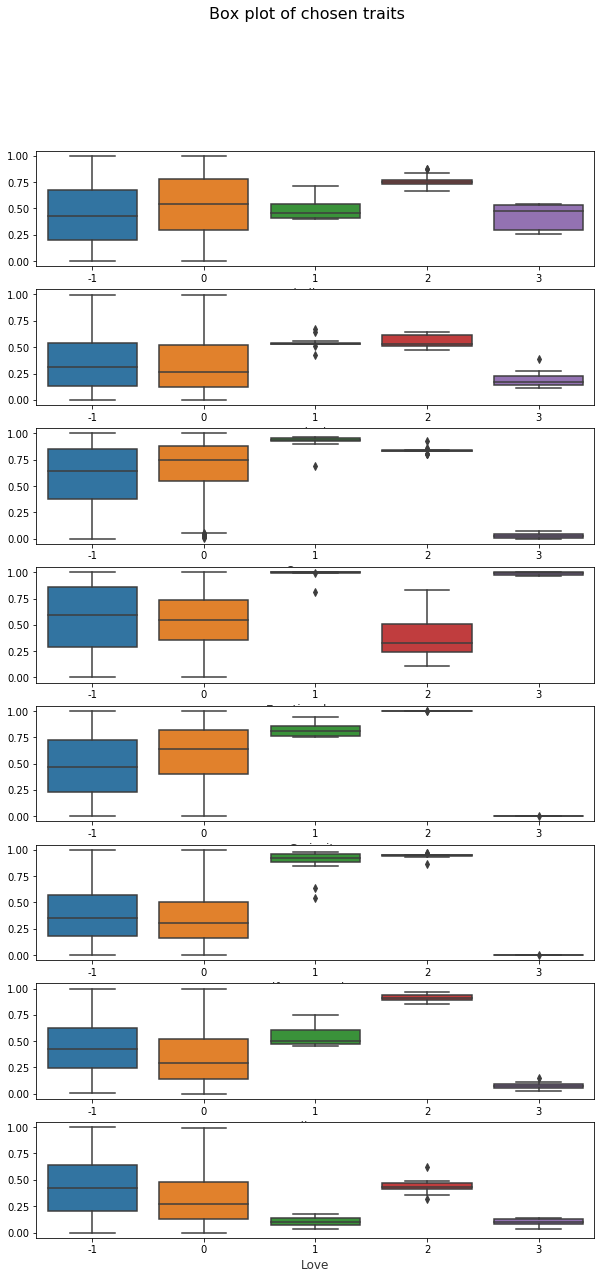

In [217]:
some_params = ['Challenge', 'Hedonism', 'Openness', 'Emotional range', 'Curiosity', 'Self-transcendence', 'Liberty', 'Love']
fig, axs = plt.subplots(len(some_params), 1, figsize=(10, 20))
fig.suptitle('Box plot of chosen traits', fontsize=16)

for i, trait in enumerate(some_params):
    boxplot(trait, 'Class', df, axs[i])
    
#plt.tight_layout()

### Evaluation

In [218]:
core_samples_ind = dbscan.core_sample_indices_
core_samples_ind

array([   2,    7,   10, ..., 5432, 5435, 5436])

In [219]:
# outliers
df.iloc[core_samples_ind][df.Class == -1]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


Empty DataFrame
Columns: [Openness, Conscientiousness, Extraversion, Agreeableness, Emotional range, Challenge, Closeness, Curiosity, Excitement, Harmony, Ideal, Liberty, Love, Practicality, Self-expression, Stability, Structure, Conservation, Openness to change, Hedonism, Self-enhancement, Self-transcendence, Class]
Index: []

[0 rows x 23 columns]

In [220]:
cluster_cores3 = []
cats, cts = np.unique(df['Class'].to_numpy(), return_counts=True)
cat = 1
for cat in cats:
    if cat != -1:
        cluster_cores3.append(df.iloc[core_samples_ind][df.Class == cat].iloc[0].to_numpy()[:-1])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [221]:
Davies_Bouldin_index(df, 'Class', cluster_cores3, Lk_norm)

1.063311867788234

In [222]:
cores = pd.DataFrame(cluster_cores3, columns=df.columns[:-1])
cores

Openness  Conscientiousness  Extraversion  Agreeableness  Emotional range  \
0  0.445128           0.776801      0.899640       0.881138         0.706536   
1  0.949226           0.568520      0.045769       0.024503         0.999974   
2  0.930517           0.492345      0.196897       0.148533         0.107883   
3  0.029850           0.443042      0.021621       0.029407         0.973271   

   Challenge  Closeness  Curiosity  Excitement   Harmony  ...      Love  \
0   0.857511   0.842577   0.751038    0.759625  0.892253  ...  0.899586   
1   0.444385   0.197901   0.789815    0.371923  0.285297  ...  0.078205   
2   0.748565   0.443305   0.999972    0.319209  0.305405  ...  0.317933   
3   0.534468   0.058171   0.000983    0.552875  0.087496  ...  0.120479   

   Practicality  Self-expression  Stability     Structure  Conservation  \
0      0.529881         0.791273   0.899268  6.075434e-01      0.917088   
1      0.692899         0.997933   0.328441  3.534727e-08      0.132778   
2      0.914590         0.856628   0.595352  8.389589e-02      0.152399   
3      0.892067         0.025320   0.461772  5.933842e-01      0.440419   

   Openness to change  Hedonism  Self-enhancement  Self-transcendence  
0            0.715703  0.825515          0.962015            0.753915  
1            0.309927  0.541657          0.382434            0.977456  
2            0.958879  0.532810          0.909798            0.939484  
3            0.130989  0.135507          0.366364            0.000344  

[4 rows x 22 columns]

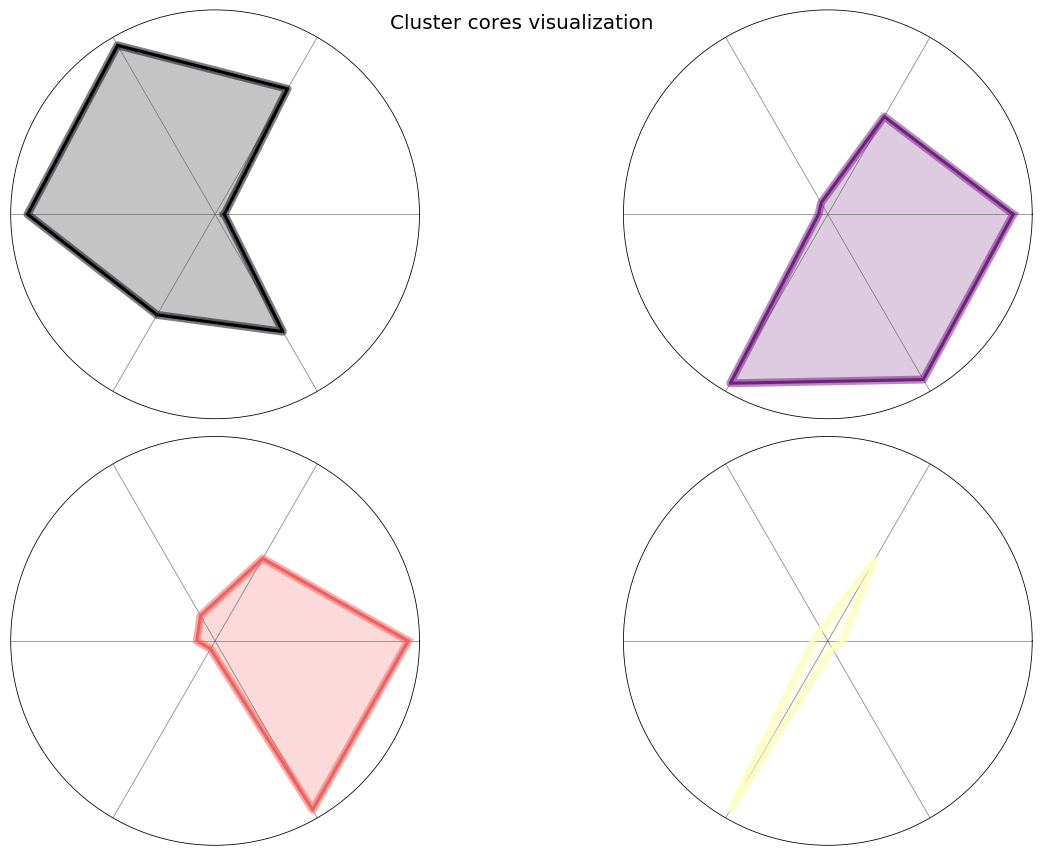

In [223]:
some_params = ['Challenge', 'Hedonism', 'Openness', 'Emotional range', 
               'Curiosity', 'Self-transcendence', 'Liberty', 'Love']

big5params = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Emotional range', 'Self-transcendence']

# Create a color palette:
my_palette = plt.cm.get_cmap("magma", len(cores.index))

nb_clusters = len(cores)
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Cluster cores visualization', fontsize=20)

for i in range(nb_clusters):
    axs = plt.subplot(2, 2, i+1, polar=True)
    radar_plot(data = cores[big5params].to_numpy()[i], traits=big5params, 
               COLOR=my_palette(i), ax=axs, drop_yticks=True, drop_xticks=True)
    
plt.tight_layout()

## Gaussian Mixtures

*A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.*

In [18]:
from sklearn.mixture import GaussianMixture

In [19]:
data = profiles.to_numpy()
N = data.shape[0]
data.shape

(5437, 22)

### Model

In [39]:
start_time = time.time()
nb_comps = 6

gm = GaussianMixture(n_components=nb_comps, init_params='random', n_init=10).fit(data)

print("Took {:.2f} seconds.".format(time.time() - start_time))

Took 8.44 seconds.


In [40]:
df_dists = pd.DataFrame()
df_mah = pd.DataFrame()

dist_means = gm.means_
dist_covs = gm.covariances_
inv_covs = np.array([np.linalg.inv(cov) for cov in dist_covs])

for i in range(nb_comps):
    df_dists['DD_{:d}'.format(i)] = profiles.apply(lambda x: Distribution_distance(x, dist_means[i], dist_covs[i]), axis=1)
    df_mah['MD_{:d}'.format(i)] = profiles.apply(lambda x: Mahalanobis_distance(x, dist_means[i], inv_covs[i]), axis=1)

df_dists.head()

DD_0       DD_1       DD_2        DD_3        DD_4        DD_5
0   7.597748  55.220196  15.741041  146.424462  198.662108   85.269097
1  22.071464  74.799657  33.557773   35.057730  433.779997  122.187765
2  21.031532  48.230032  31.831304   46.613113  378.577930  186.066484
3  10.061450  31.331872  18.995031  130.446074  238.003428   49.899244
4  12.525836  27.161703  23.429560  112.538909  187.324091  142.223902

In [41]:
df_mah.head()

MD_0        MD_1        MD_2        MD_3         MD_4        MD_5
0  10.013368   35.712917   40.474692  116.340399   253.198812   54.427098
1  29.304122  115.009435  114.191060   85.590834  1299.119958  150.922585
2  11.077232   39.451763   18.777187   44.189478   862.507803  260.479713
3  11.614791   27.137588   65.857479  149.799002   425.310590   26.408968
4  21.020044   30.992322   49.855217  178.104823   350.921287  185.511024

In [42]:
df_dists = df_dists.apply(lambda x: minmax_scaling(1/x), axis=1)
df_dists['Prediction'] = df_dists.apply(lambda x: np.argmax(x.to_numpy()), axis = 1)
df_dists.head(10)

DD_0      DD_1      DD_2      DD_3  DD_4      DD_5  Prediction
0   1.0  0.103296  0.462099  0.014186   0.0  0.052881           0
1   1.0  0.257284  0.639366  0.609717   0.0  0.136710           0
2   1.0  0.402896  0.640761  0.418912   0.0  0.060859           0
3   1.0  0.291159  0.508929  0.036395   0.0  0.166395           0
4   1.0  0.422545  0.501268  0.047619   0.0  0.022724           0
5   1.0  0.124184  0.624098  0.043884   0.0  0.107172           0
6   1.0  0.481770  0.580950  0.079670   0.0  0.082575           0
7   1.0  0.196128  0.666030  0.370041   0.0  0.058035           0
8   1.0  0.088799  0.602435  0.079606   0.0  0.033178           0
9   1.0  0.160835  0.646165  0.159011   0.0  0.057784           0

In [43]:
df_mah = df_mah.apply(lambda x: minmax_scaling(1/x), axis=1)
df_mah['Prediction'] = df_mah.apply(lambda x: np.argmax(x.to_numpy()), axis = 1)
df_mah.head(10)

MD_0      MD_1      MD_2      MD_3  MD_4      MD_5  Prediction
0   1.0  0.250754  0.216409  0.048438   0.0  0.150377           0
1   1.0  0.237600  0.239468  0.327198   0.0  0.175570           0
2   1.0  0.271422  0.584595  0.240927   0.0  0.030069           0
3   1.0  0.411937  0.153238  0.051637   0.0  0.424077           0
4   1.0  0.657732  0.384770  0.061824   0.0  0.056812           0
5   1.0  0.181654  0.275333  0.063562   0.0  0.192551           0
6   1.0  0.633393  0.200600  0.081477   0.0  0.098538           0
7   1.0  0.113702  0.668955  0.333455   0.0  0.032677           0
8   1.0  0.108146  0.306977  0.082435   0.0  0.064260           0
9   1.0  0.167106  0.222665  0.197793   0.0  0.059711           0

In [44]:
v1, c1 = np.unique(df_dists['Prediction'].to_numpy(), return_counts=True)
c1 = c1/np.sum(c1)
c1 = np.round(c1, 3)
c1

array([0.988, 0.001, 0.001, 0.005, 0.   , 0.004])

In [45]:
v2, c2 = np.unique(df_mah['Prediction'].to_numpy(), return_counts=True)
c2 = c2/np.sum(c2)
c2 = np.round(c2, 3)
c2

array([0.708, 0.074, 0.074, 0.016, 0.04 , 0.088])

In [201]:
df = profiles.copy()
df['Class'] = df_mah['Prediction']
df.head()

Openness  Conscientiousness  Extraversion  Agreeableness  Emotional range  \
0  0.672358           0.515518      0.202560       0.388493         0.952090   
1  0.769577           0.442860      0.063138       0.152624         0.998766   
2  0.445128           0.776801      0.899640       0.881138         0.706536   
3  0.707812           0.725007      0.057476       0.296220         0.990815   
4  0.659059           0.788241      0.708605       0.238162         0.566861   

   Challenge  Closeness  Curiosity  Excitement   Harmony  ...  Practicality  \
0   0.449133   0.491036   0.373575    0.361041  0.673358  ...      0.527576   
1   0.792551   0.712586   0.726484    0.940915  0.769730  ...      0.991403   
2   0.857511   0.842577   0.751038    0.759625  0.892253  ...      0.529881   
3   0.551724   0.447475   0.519926    0.487398  0.721506  ...      0.546406   
4   0.686579   0.331890   0.248036    0.528839  0.559211  ...      0.619599   

   Self-expression  Stability  Structure  Conservation  Openness to change  \
0         0.765530   0.314229   0.463151      0.362166            0.480516   
1         0.998430   0.923608   0.908561      0.743416            0.608181   
2         0.791273   0.899268   0.607543      0.917088            0.715703   
3         0.840359   0.770971   0.740211      0.411759            0.566608   
4         0.413212   0.747458   0.800460      0.741150            0.436434   

   Hedonism  Self-enhancement  Self-transcendence  Class  
0  0.437073          0.592248            0.485292      2  
1  0.473193          0.882402            0.857386      2  
2  0.825515          0.962015            0.753915      2  
3  0.215377          0.478906            0.604419      2  
4  0.685875          0.959131            0.235388      2  

[5 rows x 23 columns]

In [202]:
cores = pd.DataFrame(dist_means, columns=profiles.columns)
cores

Openness  Conscientiousness  Extraversion  Agreeableness  Emotional range  \
0  0.885442           0.663564      0.421695       0.390731         0.401597   
1  0.512135           0.827267      0.365346       0.458988         0.535752   
2  0.643972           0.588086      0.430717       0.439840         0.565415   
3  0.720857           0.812950      0.345155       0.514113         0.527580   
4  0.644131           0.407226      0.274926       0.449997         0.625216   

   Challenge  Closeness  Curiosity  Excitement   Harmony  ...      Love  \
0   0.276711   0.142853   0.478721    0.103906  0.224938  ...  0.112903   
1   0.668393   0.439419   0.346107    0.440879  0.506542  ...  0.340794   
2   0.382506   0.431174   0.515443    0.387311  0.488995  ...  0.404625   
3   0.525580   0.354909   0.593020    0.187267  0.471439  ...  0.314567   
4   0.612801   0.505472   0.759389    0.506835  0.630973  ...  0.475170   

   Practicality  Self-expression  Stability  Structure  Conservation  \
0      0.255907         0.228640   0.399162   0.600705      0.174887   
1      0.475445         0.355362   0.664859   0.723970      0.618983   
2      0.440866         0.535607   0.494698   0.428813      0.401739   
3      0.316328         0.335177   0.543373   0.706028      0.343039   
4      0.557732         0.611623   0.599804   0.630445      0.465820   

   Openness to change  Hedonism  Self-enhancement  Self-transcendence  
0            0.297242  0.205993          0.206551            0.136243  
1            0.391251  0.372358          0.583528            0.253910  
2            0.474798  0.332780          0.427610            0.399512  
3            0.476018  0.105589          0.303014            0.324645  
4            0.661316  0.578768          0.665430            0.529035  

[5 rows x 22 columns]

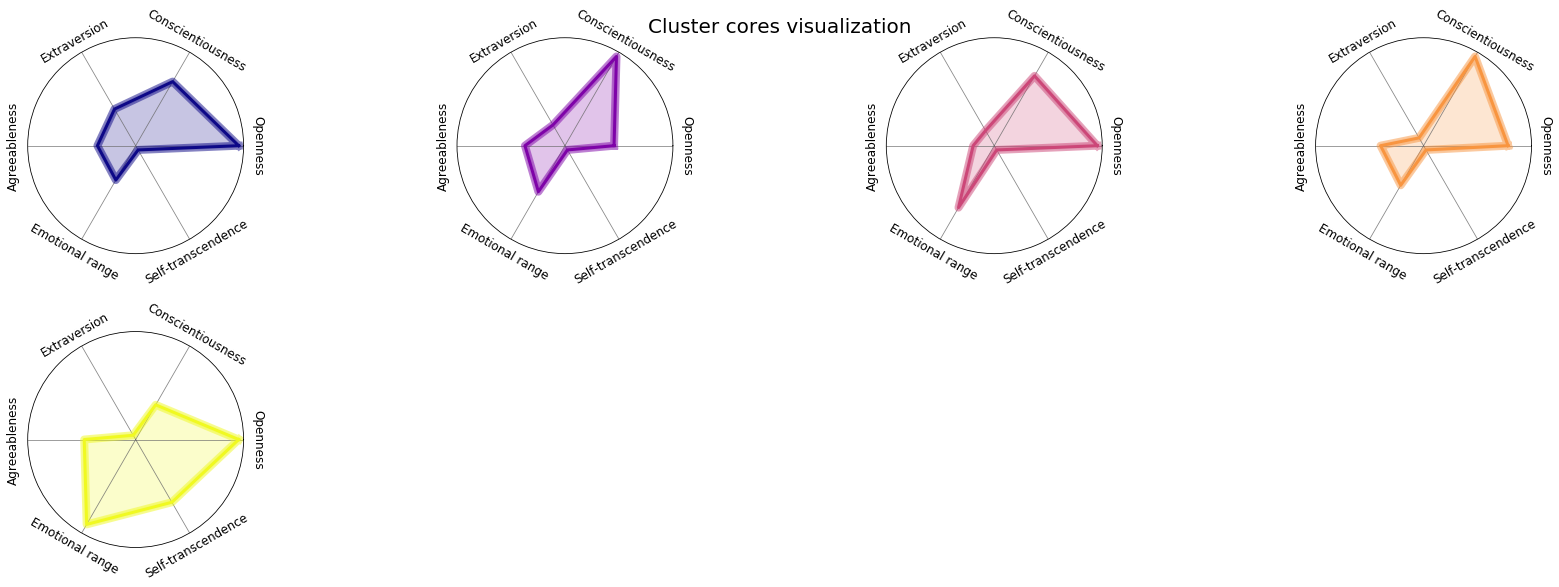

In [203]:
some_params = ['Challenge', 'Hedonism', 'Openness', 'Emotional range', 
               'Curiosity', 'Self-transcendence', 'Liberty', 'Love']

big5params = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Emotional range', 'Self-transcendence']

# Create a color palette:
my_palette = plt.cm.get_cmap("plasma", len(cores.index))

nb_clusters = len(cores)
fig = plt.figure(figsize=(24, 16))
fig.suptitle('Cluster cores visualization', fontsize=20)

for i in range(nb_clusters):
    axs = plt.subplot(4, 4, i+1, polar=True)
    radar_plot(data = cores[big5params].to_numpy()[i], traits=big5params, 
               COLOR=my_palette(i), ax=axs, drop_yticks=True, drop_xticks=False)
    
plt.tight_layout()

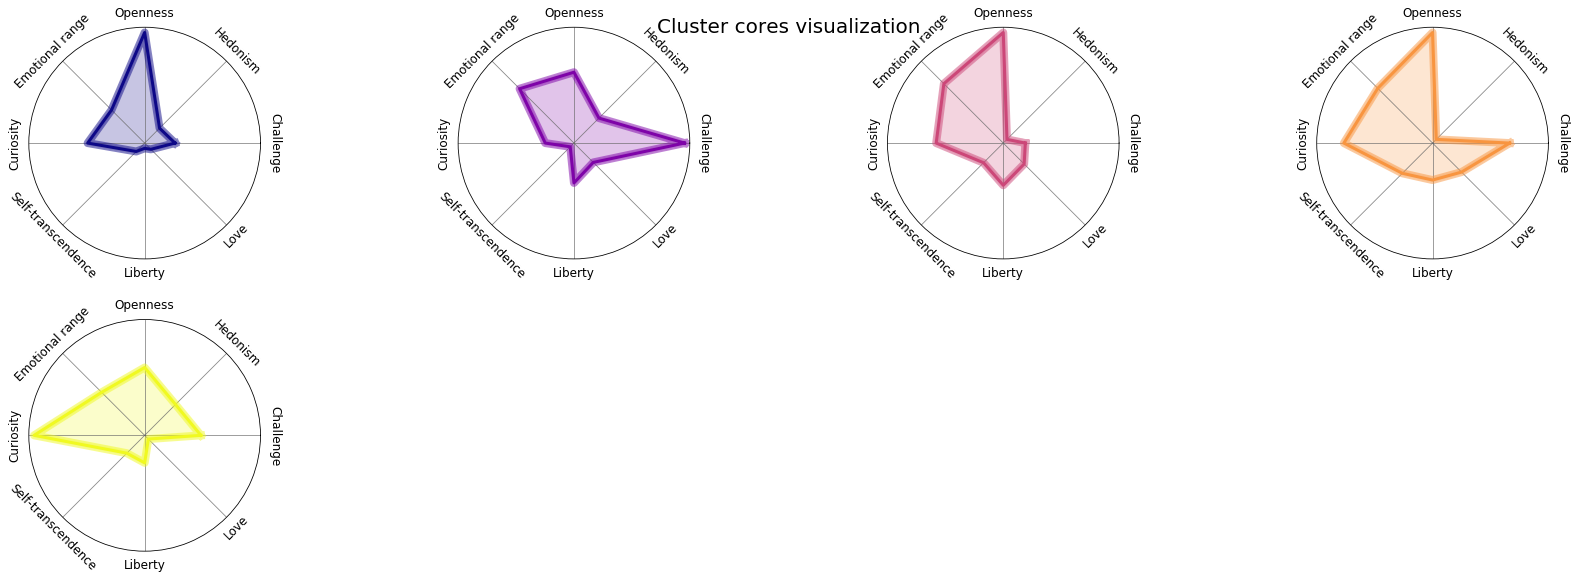

In [204]:
some_params = ['Challenge', 'Hedonism', 'Openness', 'Emotional range', 
               'Curiosity', 'Self-transcendence', 'Liberty', 'Love']

big5params = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Emotional range', 'Self-transcendence']

# Create a color palette:
my_palette = plt.cm.get_cmap("plasma", len(cores.index))

nb_clusters = len(cores)
fig = plt.figure(figsize=(24, 16))
fig.suptitle('Cluster cores visualization', fontsize=20)

for i in range(nb_clusters):
    axs = plt.subplot(4, 4, i+1, polar=True)
    radar_plot(data = cores[some_params].to_numpy()[i], traits=some_params, 
               COLOR=my_palette(i), ax=axs, drop_yticks=True, drop_xticks=False)
    
plt.tight_layout()

### Visualization

In [205]:
df = profiles.copy()
df['Class'] = df_mah['Prediction']
df.head()

Openness  Conscientiousness  Extraversion  Agreeableness  Emotional range  \
0  0.672358           0.515518      0.202560       0.388493         0.952090   
1  0.769577           0.442860      0.063138       0.152624         0.998766   
2  0.445128           0.776801      0.899640       0.881138         0.706536   
3  0.707812           0.725007      0.057476       0.296220         0.990815   
4  0.659059           0.788241      0.708605       0.238162         0.566861   

   Challenge  Closeness  Curiosity  Excitement   Harmony  ...  Practicality  \
0   0.449133   0.491036   0.373575    0.361041  0.673358  ...      0.527576   
1   0.792551   0.712586   0.726484    0.940915  0.769730  ...      0.991403   
2   0.857511   0.842577   0.751038    0.759625  0.892253  ...      0.529881   
3   0.551724   0.447475   0.519926    0.487398  0.721506  ...      0.546406   
4   0.686579   0.331890   0.248036    0.528839  0.559211  ...      0.619599   

   Self-expression  Stability  Structure  Conservation  Openness to change  \
0         0.765530   0.314229   0.463151      0.362166            0.480516   
1         0.998430   0.923608   0.908561      0.743416            0.608181   
2         0.791273   0.899268   0.607543      0.917088            0.715703   
3         0.840359   0.770971   0.740211      0.411759            0.566608   
4         0.413212   0.747458   0.800460      0.741150            0.436434   

   Hedonism  Self-enhancement  Self-transcendence  Class  
0  0.437073          0.592248            0.485292      2  
1  0.473193          0.882402            0.857386      2  
2  0.825515          0.962015            0.753915      2  
3  0.215377          0.478906            0.604419      2  
4  0.685875          0.959131            0.235388      2  

[5 rows x 23 columns]

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


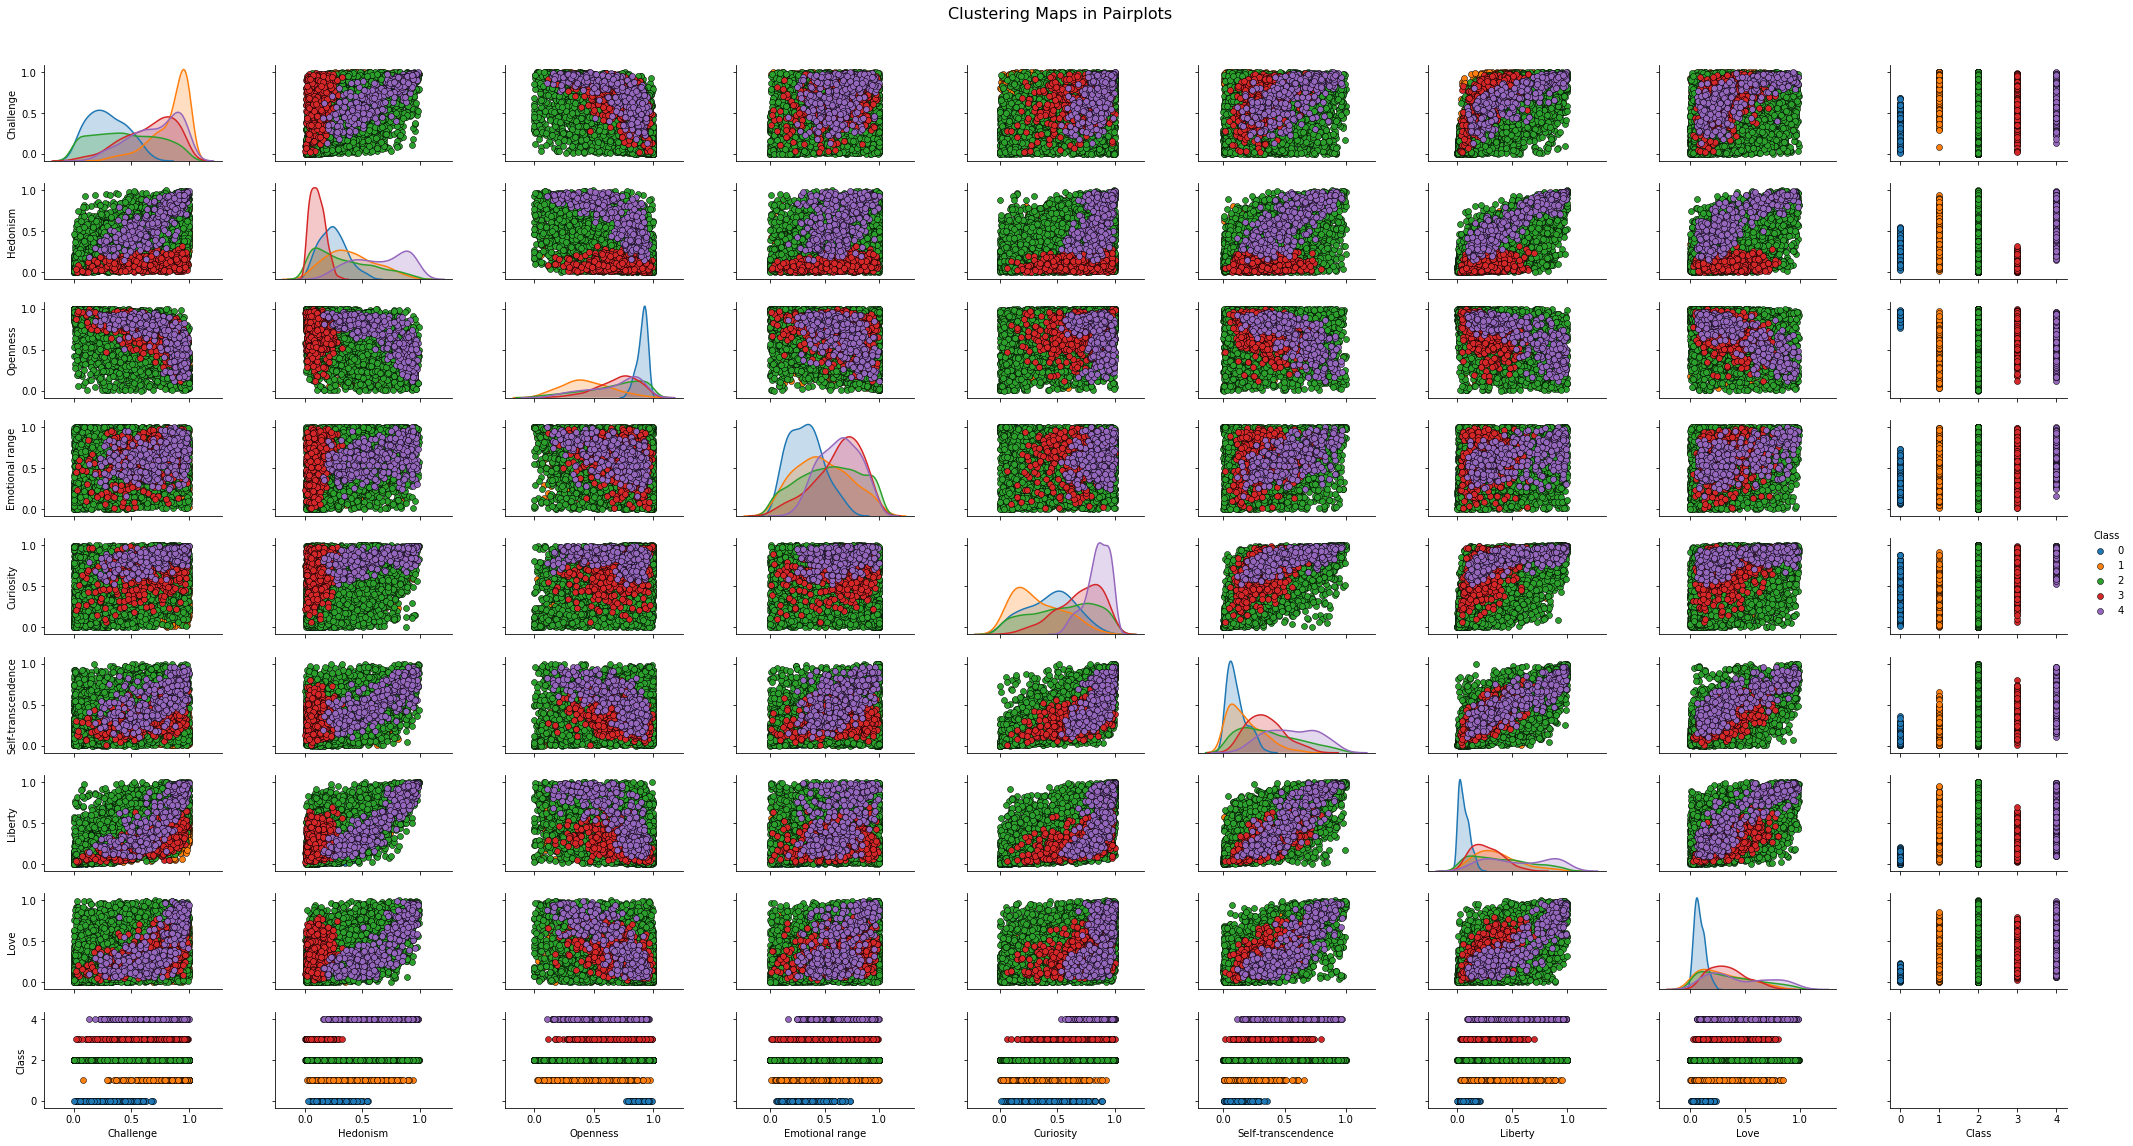

In [206]:
some_params = ['Challenge', 'Hedonism', 'Openness', 'Emotional range', 
               'Curiosity', 'Self-transcendence', 'Liberty', 'Love',
              'Class']

pp = sns.pairplot(df[some_params], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True), 
                 hue='Class')

fig = pp.fig 

fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Clustering Maps in Pairplots', fontsize=16)

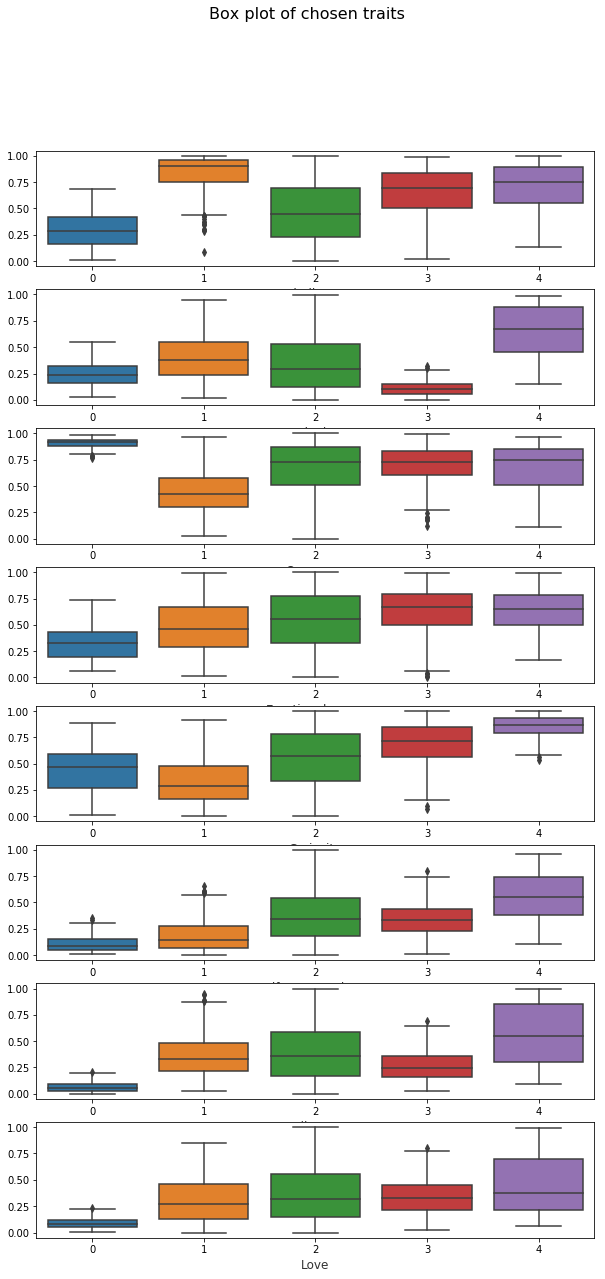

In [207]:
some_params = ['Challenge', 'Hedonism', 'Openness', 'Emotional range', 'Curiosity', 'Self-transcendence', 'Liberty', 'Love']
fig, axs = plt.subplots(len(some_params), 1, figsize=(10, 20))
fig.suptitle('Box plot of chosen traits', fontsize=16)

for i, trait in enumerate(some_params):
    boxplot(trait, 'Class', df, axs[i])

### Evaluation

In [208]:
Davies_Bouldin_index(df, 'Class', dist_means, Lk_norm)

3.1753985715076674

In [209]:
Davies_Bouldin_Mahalanobis(df, 'Class', dist_means, inv_covs)

5.980807339391189

Silhouette quality of each cluster:
       Silhouette
Class            
0.0      0.263324
1.0      0.003885
2.0     -0.157263
3.0      0.033769
4.0      0.096064
Silhouette score of the clustering is:  -0.0987431332459242


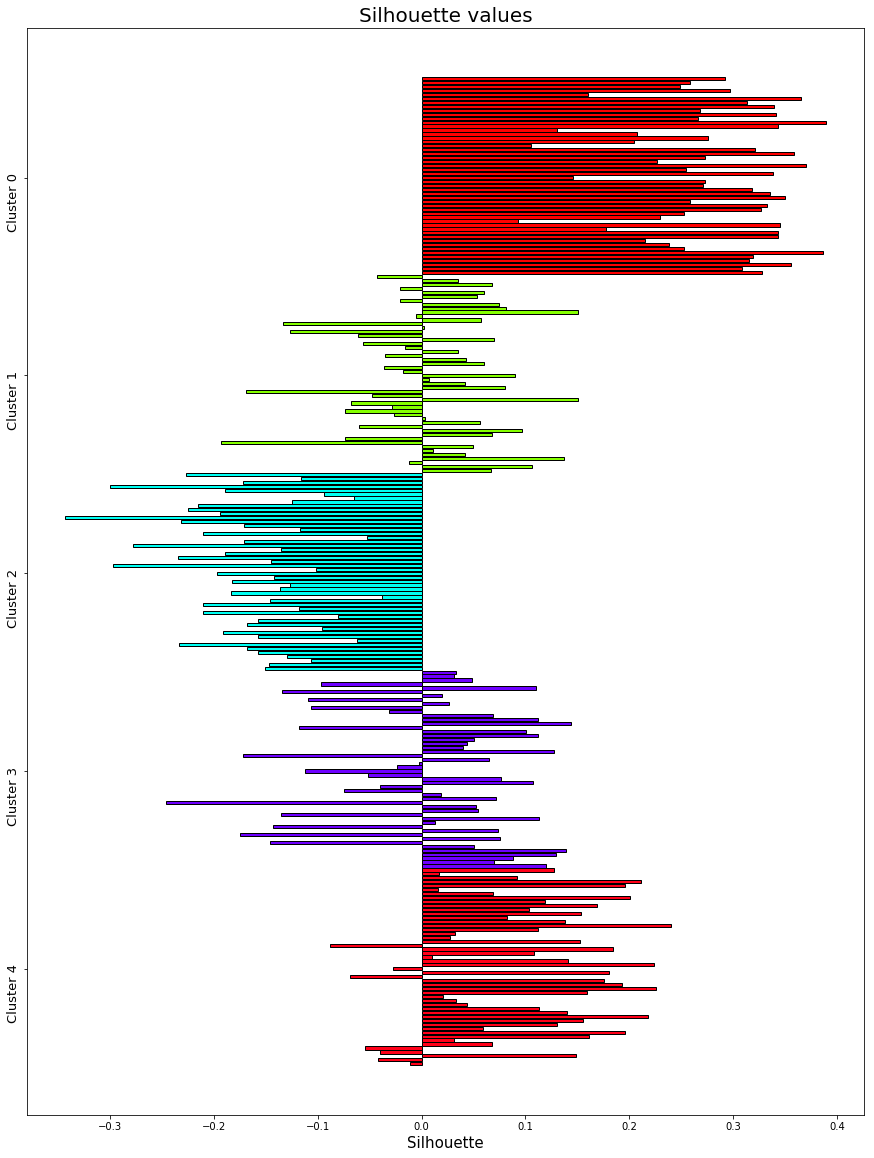

In [213]:
sil_df = silhouette_evaluation(df, distance='mahalanobis')